# Reinforcement Learning - An Introduction (Barto and Sutton)
## Chapter 2: Multi-armed Bandits

### The K-armed bandit problem
You are faced repeatedly with a choice among k different options, or actions. After each action you take you receive a numerical reward chosen from a **staionary probability distribution** that depends on the action I have selected. The objective is to maximize the expected total reward over some time period (e.g. 1000 action selections, or time steps). 
The value of an arbitrary action a, denoted $q_*a$ is the expected reward given that a is selected,
$$   q_*(a) = \textbf{E}[R_t \mid A_t = a]   $$

Here $q_*(a)$ is the true expected reward which is unknown. The estimated value of action $a$ at time step $t$ is given as,
$$ Q_t(a) = \dfrac{\sum_{i=1}^{t-1}R_i*\textbf{1}_{A_i = a}}{\sum_{i=1}^{t-1}\textbf{1}_{A_i = a}} $$

At timestep t, the greedy action can be selected as follows,

$$ A_t = \argmax_a Q_t(a)$$

The following code is the implementation of 10-armed testbed from book.



In [14]:
# Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt

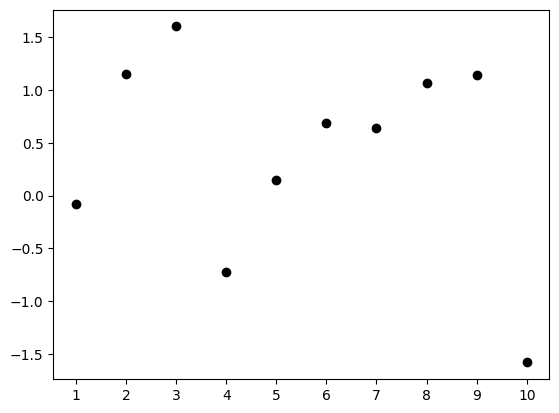

In [15]:
# One armed bandit problem
k = 10 # number of arms
mu, sigma = 0, 1 # mean and standard deviation for normal distribution
one_reward_dist = np.random.normal(mu, sigma, k)

# Selecting and plotting rewards for the k actions taken according to the distribution
x_vals = range(1,k+1)
y_vals = one_reward_dist
plt.plot(x_vals, y_vals, 'o', color='black')
plt.xticks(x_vals)
plt.show()


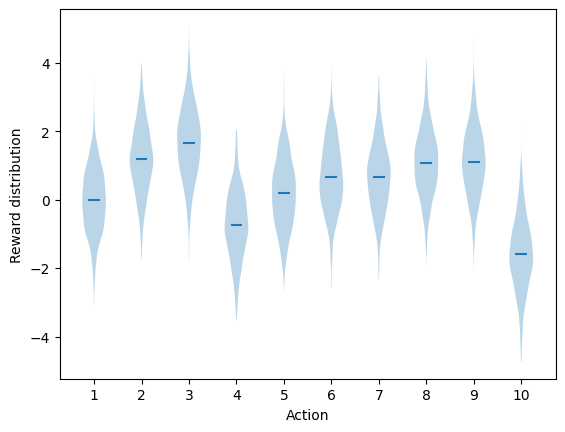

In [16]:
# Drawing distributions for the k-arms (Figure 2.1 from the book)
timesteps = 1000
k_reward_dist = [np.random.normal(r, sigma, timesteps) for r in one_reward_dist]
plt.violinplot(k_reward_dist, showmeans=True, showextrema=False)
plt.xticks(x_vals)
plt.xlabel('Action')
plt.ylabel('Reward distribution')
plt.show()

Current epsilon:  0
Running step  2 using sample-average method for epsilon:  0
Running step  3 using sample-average method for epsilon:  0
Running step  4 using sample-average method for epsilon:  0
Running step  5 using sample-average method for epsilon:  0
Running step  6 using sample-average method for epsilon:  0
Running step  7 using sample-average method for epsilon:  0
Running step  8 using sample-average method for epsilon:  0
Running step  9 using sample-average method for epsilon:  0
Running step  10 using sample-average method for epsilon:  0
Running step  11 using sample-average method for epsilon:  0
Running step  12 using sample-average method for epsilon:  0
Running step  13 using sample-average method for epsilon:  0
Running step  14 using sample-average method for epsilon:  0
Running step  15 using sample-average method for epsilon:  0
Running step  16 using sample-average method for epsilon:  0
Running step  17 using sample-average method for epsilon:  0
Running step

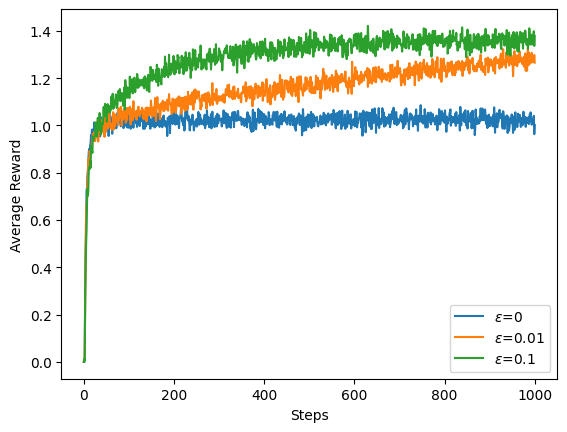

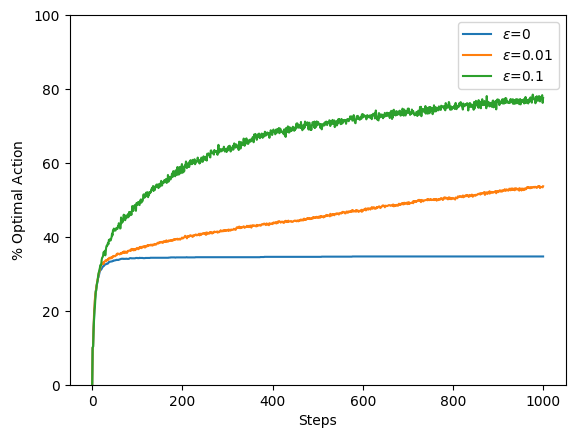

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# epsilon-greedy method for n-bandits
mu, sigma = 0, 1 # mean and standard deviation. Here variance is same as standard deviation
k = 10
timesteps = 1000
n_bandits = 2000
epsilon = [0, 0.01, 0.1]

# true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k)) # the true rewards are taken from normal distribution
opt_action = np.argmax(Q_true, 1) # the optimal action is the action that have maximum expected rewards

# for plotting graphs
fig1 = plt.figure(1).gca() # Figure 2.2(a) from the book
fig2 = plt.figure(2).gca() # Figure 2.2(b) from the book
x_vals = range(timesteps+1)

for ep in epsilon: # run the full experiment for each epsilon
    print("Current epsilon: ", ep)
    # step 0
    Q_values = np.zeros((n_bandits, k)) # all estimated rewards are zero initially
    rewards = [0] # initial average rewards over all bandits are also zero
    opt_action_ratio = [0] # % of optimal action taken

    # step 1
    N_values = np.ones((n_bandits, k)) # number of actions taken. All actions are taken once at step 1
    Q_init = np.random.normal(Q_true, sigma) # the rewards at step 1 are taken from the true rewards for each action
    rewards.append(np.mean(Q_init)) # average reward after step 1
    opt_action_ratio.append(10) # 10% time Optimal action is taken

    # step 2-timesteps
    for t in range(2, timesteps+1):
        print("Running step ", t, "using sample-average method for epsilon: ", ep)
        step_rewards = [] # rewards for this step
        opt_action_taken = 0 # number of optimal actions taken in this step
        for i in range(n_bandits):
            if np.random.random() < ep:
                act = np.random.randint(k) # random action
            else:
                act = np.argmax(Q_values[i]) # greedy action
            if act == opt_action[i]:
                opt_action_taken += 1 # if the action taken is the optimal, then increase the count
            R = np.random.normal(Q_true[i][act], sigma) # select the true expected reward
            step_rewards.append(R) # append it in step rewards
            N_values[i][act] += 1 # update the number of actions taken
            Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])/N_values[i][act] # update the queue values
        R_avg = np.mean(step_rewards) # average reward for this step
        rewards.append(R_avg) # add the average reward for this step
        opt_action_ratio.append(opt_action_taken*100/n_bandits) # % of optimal action taken is added
    # plotting the graphs
    fig1.plot(x_vals, rewards)
    fig2.plot(x_vals, opt_action_ratio)
# labels and legends for the plots
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
plt.show()

In the above implementation, a simple bandit algorithm given in the text book is used where the estimated reward for $n$ time steps is computed incrementally:

$$ Q_{n+1} = \dfrac{1}{n}\sum_{i=1}^{n}R_i = Q_n + \dfrac{1}{n}[R_n - Q_n] $$ 
Which holds even for $n=1$, $Q_2 = R_1$ for arbitrary $Q_1$. The proof is given in the book. It requires memory only for $Q_n$ and $n$.

**Non-stationary rewards**: 
In the above implementation, the reward $R_i$ is assumed to be stationary (the probability does not change with time). But it makes more sense to give more weight to recent rewards than long-past rewards. There are two ways to do it:
1.  **Use constant step-size**: The step size $\alpha$ is used instead of $\frac{1}{n}$. Hence we have,
$$ Q_{n+1} = Q_n + \alpha[R_n - Q_n] = (1-\alpha)^nQ_1 + \sum_{i=1}^n \alpha(1-\alpha)^{n-i}R_i$$
2. **Use variable step-size**: The step size $\alpha_n$ is depended on number of steps $n$. Hence we have,
$$ Q_{n+1} = Q_n + \alpha_n[R_n - Q_n] = \sum_{i=1}^n \alpha_nR_n - R_{n-1} \prod_{i=1}^n\alpha_n + Q_1 \prod_{i=1}^n (1-\alpha_n)$$

The derivation of (1) is given in the proof and (2) is taken from exercise 2.4. This is called weighted average because the sum of the weights is $(1-\alpha)^n + \sum_{i=1}^n \alpha(1-\alpha)^{n-i}=1$. The weight $\alpha(1-\alpha)^{n-i}$ given to reward $R_i$ depends on how many rewards ago $(n-i)$  it was observed. The weight decays exponentially according to the exponent $(1-\alpha)$. It is called an $exponential$ $recency-weighted$ $average$.

The above implementation has variable step-size as we have $\alpha_n(a) = \frac{1}{n}$. The estimated rewards $Q_n(a)$ should be guaranted to converge to true action value $q_*(a)$. To do this, a well-known result in stochastic approximation theory gives us the following conditions:
1.  $$\sum_{n=1}^\infty \alpha_n(a) = \infty $$
2.  $$\sum_{n=1}^\infty \alpha^2_n(a) < \infty $$

Both convergence conditions are met for the sample-average case, $\alpha_n(a) = \frac{1}{n}$, but not for the case of constant step-size parameter, $\alpha_n(a) = \alpha$. In the latter case, the second condition is not met, indicating that the estimates never completely converge but continue to vary in response to the most recently received rewards. **This is actually desirable in a nonstationary environment, and problems that are effectively nonstationary are the most common in reinforcement learning.** Although sequences of step-size parameters that meet these convergence conditions are often used in theoretical work, they are seldom used in applications and empirical research. 

The following code is the implementation of the programming task given in exercise 2.5:

(Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step size parameter $\alpha = 0.1$. Use $\epsilon=0.1$ and longer runs, say of 10,000 steps.)




Running step  2 for  sample-average
Running step  3 for  sample-average
Running step  4 for  sample-average
Running step  5 for  sample-average
Running step  6 for  sample-average
Running step  7 for  sample-average
Running step  8 for  sample-average
Running step  9 for  sample-average
Running step  10 for  sample-average
Running step  11 for  sample-average
Running step  12 for  sample-average
Running step  13 for  sample-average
Running step  14 for  sample-average
Running step  15 for  sample-average
Running step  16 for  sample-average
Running step  17 for  sample-average
Running step  18 for  sample-average
Running step  19 for  sample-average
Running step  20 for  sample-average
Running step  21 for  sample-average
Running step  22 for  sample-average
Running step  23 for  sample-average
Running step  24 for  sample-average
Running step  25 for  sample-average
Running step  26 for  sample-average
Running step  27 for  sample-average
Running step  28 for  sample-average
Running s

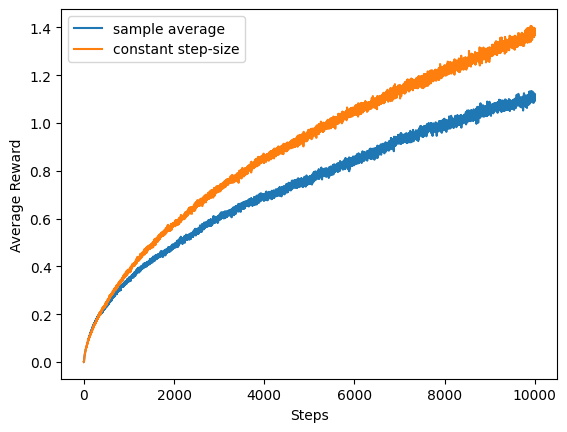

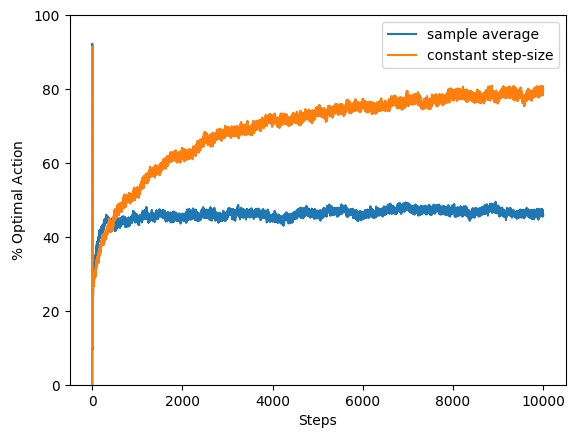

In [20]:
# Implementation of exercise 2.5
import numpy as np 
import matplotlib.pyplot as plt 

# epsilon-greedy method for n-bandits
mu, sigma = 0, 0.01 # mean, standard deviation
k = 10 # number of arms
time_steps = 10000 # number of time steps
n_bandits = 2000 # number of problems/bandits
ep = 0.1 # epsilon for epsilon-greedy algorithm

# for plotting graphs
fig1 = plt.figure(1).gca() # Figure 2.5(a) from the book
fig2 = plt.figure(2).gca() # Figure 2.5(b) from the book
x_vals = range(time_steps+1)

# Experiments
experiments = ['sample-average', 'constant step-size']

for exp in experiments:
    # true values
    Q_true = np.zeros((n_bandits, k)) # the true rewards are zero initially
    opt_action = np.argmax(Q_true, 1) # the optimal action is the action that have maximum expected rewards

    # step 0
    Q_values = np.zeros((n_bandits, k))
    rewards = []
    rewards.append(0) # Initial rewards are zero
    opt_actions_ratio = [] # Ratio of optimal action taken
    opt_actions_ratio.append(0) 

    # step 1
    N_values = np.ones((n_bandits, k)) # number of actions taken, each action is taken once
    rewards.append(0) # rewards after step 1
    opt_actions_ratio.append(0) 

    # step 2-time_steps
    for step in range(2, time_steps+1):
        print("Running step ", step, "for ", exp)
        step_rewards = [] # rewards in this step
        opt_actions = 0 # how many times optimal action is taken
        for i in range(n_bandits):
            if np.random.random() < ep:
                act = np.random.randint(k) # random action
            else:
                act = np.argmax(Q_values[i]) # greedy action

            if act == opt_action[i]: # check if the action taken is the optimal action or not
                opt_actions += 1

            R = np.random.normal(Q_true[i][act], sigma) # reward taken from Q_values        
            step_rewards.append(R) # add R to step rewards
            N_values[i][act] += 1 # number of actions taken increased
            alpha = 1/N_values[i][act] if (exp == 'sample-average') else 0.1
            Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])*alpha # Update Q values
        Q_true += np.random.normal(mu, sigma, (n_bandits, k))
        opt_action = np.argmax(Q_true, 1)
        average_reward = np.mean(step_rewards) # get the average rewards for n_bandits
        rewards.append(average_reward) # add the average reward to total
        opt_actions_ratio.append(float(opt_actions)*100 /n_bandits) # append the values for this step
    # Plotting the reward graph for each epsilon
    fig1.plot(x_vals, rewards)
    fig2.plot(x_vals, opt_actions_ratio)

# labels and legends for the plots
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend((r'sample average', r'constant step-size'), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r'sample average', r'constant step-size'), loc='best')
plt.show()

**Optimistic initial values**: All the methods we have discussed so far are dependent to some extent on the initial action-value estimates, $Q_1(a)$. Suppose that instead of setting the initial action values to zero, as we did in the 10-armed testbed, we set them all to +5. Recall that the $q_*(a)$ in this problem are selected from a normal distribution with mean 0 and variance 1. An initial estimate of +5 is thus wildly optimistic. The implementation of figure 2.3 from the book is given below,


Current epsilon:  0
Running step  2 using constant step-size method for epsilon:  0
Running step  3 using constant step-size method for epsilon:  0
Running step  4 using constant step-size method for epsilon:  0
Running step  5 using constant step-size method for epsilon:  0
Running step  6 using constant step-size method for epsilon:  0
Running step  7 using constant step-size method for epsilon:  0
Running step  8 using constant step-size method for epsilon:  0
Running step  9 using constant step-size method for epsilon:  0
Running step  10 using constant step-size method for epsilon:  0
Running step  11 using constant step-size method for epsilon:  0
Running step  12 using constant step-size method for epsilon:  0
Running step  13 using constant step-size method for epsilon:  0
Running step  14 using constant step-size method for epsilon:  0
Running step  15 using constant step-size method for epsilon:  0
Running step  16 using constant step-size method for epsilon:  0
Running step 

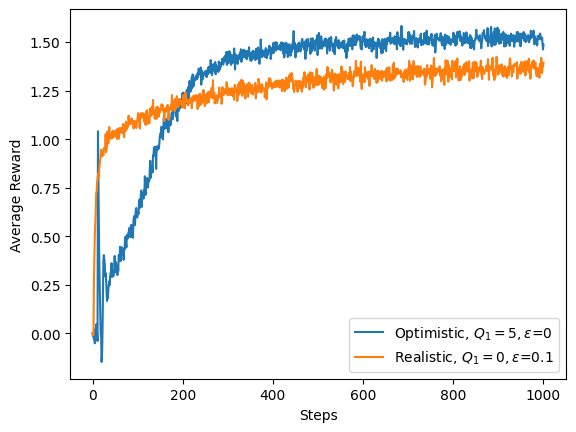

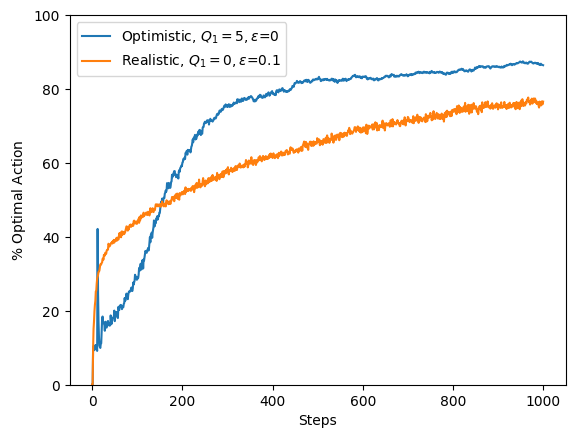

In [3]:
# Implementation of Figure 2.3 from the book
import numpy as np 
import matplotlib.pyplot as plt

# epsilon-greedy method for n-bandits
mu, sigma = 0, 1 # mean and standard deviation. Here variance is same as standard deviation
k = 10
timesteps = 1000
n_bandits = 2000
epsilon = [0, 0.1]

# true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k)) # the true rewards are taken from normal distribution
opt_action = np.argmax(Q_true, 1) # the optimal action is the action that have maximum expected rewards

# for plotting graphs
fig1 = plt.figure(1).gca() # Figure 2.3(a) from the book
fig2 = plt.figure(2).gca() # Figure 2.3(b) from the book
x_vals = range(timesteps+1)

# constant step-size method
alpha = 0.1
for ep in epsilon: # run the full experiment for each epsilon
    print("Current epsilon: ", ep)
    # step 0
    Q_values = np.zeros((n_bandits, k)) if (ep==0.1) else np.ones((n_bandits, k))*5 # biased initial action values
    rewards = [0] # initial average rewards over all bandits are also zero
    opt_action_ratio = [0] # % of optimal action taken

    # step 1
    N_values = np.ones((n_bandits, k)) # number of actions taken. All actions are taken once at step 1
    Q_init = np.random.normal(Q_true, sigma) # the rewards at step 1 are taken from the true rewards for each action
    rewards.append(np.mean(Q_init)) # average reward after step 1
    opt_action_ratio.append(0) # Optimal action is not taken

    # step 2-timesteps
    for t in range(2, timesteps+1):
        print("Running step ", t, "using constant step-size method for epsilon: ", ep)
        step_rewards = [] # rewards for this step
        opt_action_taken = 0 # number of optimal actions taken in this step
        for i in range(n_bandits):
            if np.random.random() < ep:
                act = np.random.randint(k) # random action
            else:
                act = np.argmax(Q_values[i]) # greedy action
            if act == opt_action[i]:
                opt_action_taken += 1 # if the action taken is the optimal, then increase the count
            R = np.random.normal(Q_true[i][act], sigma) # select the true expected reward
            step_rewards.append(R) # append it in step rewards
            N_values[i][act] += 1 # update the number of actions taken
            Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])*alpha # update the queue values
        R_avg = np.mean(step_rewards) # average reward for this step
        rewards.append(R_avg) # add the average reward for this step
        opt_action_ratio.append(opt_action_taken*100/n_bandits) # % of optimal action taken is added
    # plotting the graphs
    fig1.plot(x_vals, rewards)
    fig2.plot(x_vals, opt_action_ratio)
# labels and legends for the plots
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend((r'Optimistic, $Q_1=5, \epsilon$='+str(epsilon[0]), r'Realistic, $Q_1=0, \epsilon$='+str(epsilon[1])), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r'Optimistic, $Q_1=5, \epsilon$='+str(epsilon[0]), r'Realistic, $Q_1=0, \epsilon$='+str(epsilon[1])), loc='best')
plt.show()

**Upper-Confidence-Bound Action Selection**: Exploration is needed because there is always uncertainty about the accuracy of the action-value estimates. The greedy actions are those that look best at present, but some of the other actions may actually be better. $\epsilon$-greedy action selection forces the non-greedy actions to be tried, but indiscriminately, with no preference for those that are nearly greedy or particularly uncertain. It would be better to select among the non-greedy actions according to their potential for actually being optimal, taking into account both how close their estimates are to being maximal and the uncertainties in those estimates. One effective way of doing this is to select actions according to

$$ A_t = \argmax_a [ Q_t(a) +  c \sqrt{ \frac{\ln{t}}{N_t(a)}} ] $$

where $\ln{t}$ denotes the natural logarithm of t, $N_t(a)$ denotes the number of times that action $a$ has been selected prior to time $t$, and the number $c>0$ controls the degree of exploration. The implementation of Figure 2.4 is given as follows,

Current epsilon:  0
Running step  1 using sample-average method for epsilon:  0
Running step  2 using sample-average method for epsilon:  0
Running step  3 using sample-average method for epsilon:  0
Running step  4 using sample-average method for epsilon:  0
Running step  5 using sample-average method for epsilon:  0
Running step  6 using sample-average method for epsilon:  0


C:\Users\jahid\AppData\Local\Temp\ipykernel_13260\3721756870.py:47: RuntimeWarning: invalid value encountered in divide
  act = np.argmax(Q_values[i]+c * np.sqrt((np.log(t)/N_values[i])))
C:\Users\jahid\AppData\Local\Temp\ipykernel_13260\3721756870.py:47: RuntimeWarning: divide by zero encountered in divide
  act = np.argmax(Q_values[i]+c * np.sqrt((np.log(t)/N_values[i])))


Running step  7 using sample-average method for epsilon:  0
Running step  8 using sample-average method for epsilon:  0
Running step  9 using sample-average method for epsilon:  0
Running step  10 using sample-average method for epsilon:  0
Running step  11 using sample-average method for epsilon:  0
Running step  12 using sample-average method for epsilon:  0
Running step  13 using sample-average method for epsilon:  0
Running step  14 using sample-average method for epsilon:  0
Running step  15 using sample-average method for epsilon:  0
Running step  16 using sample-average method for epsilon:  0
Running step  17 using sample-average method for epsilon:  0
Running step  18 using sample-average method for epsilon:  0
Running step  19 using sample-average method for epsilon:  0
Running step  20 using sample-average method for epsilon:  0
Running step  21 using sample-average method for epsilon:  0
Running step  22 using sample-average method for epsilon:  0
Running step  23 using samp

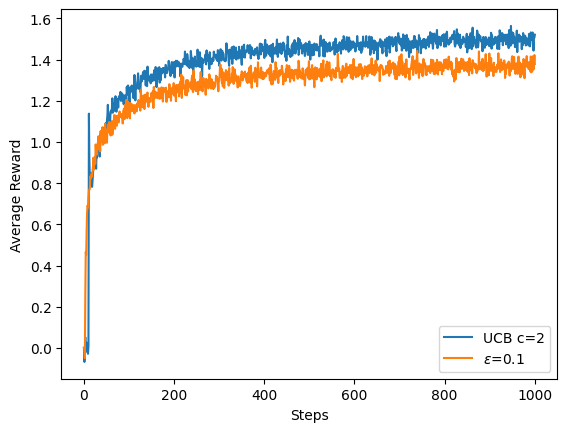

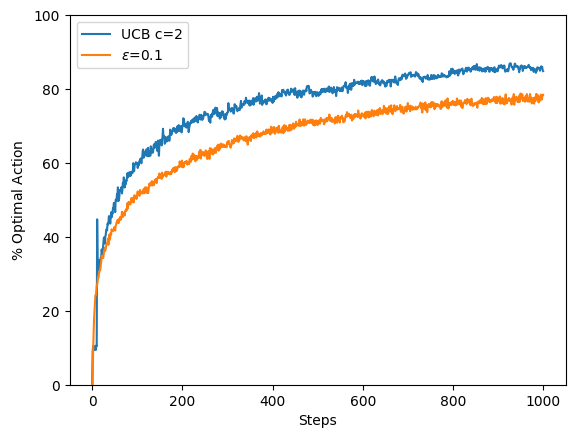

In [3]:
# Implementation of Figure 2.4 from the book
import numpy as np 
import matplotlib.pyplot as plt

# epsilon-greedy method for n-bandits
mu, sigma = 0, 1 # mean and standard deviation. Here variance is same as standard deviation
k = 10
timesteps = 1000
n_bandits = 2000
epsilon = [0, 0.1]

# true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k)) # the true rewards are taken from normal distribution
opt_action = np.argmax(Q_true, 1) # the optimal action is the action that have maximum expected rewards

# for plotting graphs
fig1 = plt.figure(1).gca() # Figure 2.4(a) from the book
fig2 = plt.figure(2).gca() # Figure 2.4(b) from the book
x_vals = range(timesteps+1)

for ep in epsilon: # run the full experiment for each epsilon
    print("Current epsilon: ", ep)
    # step 0
    Q_values = np.zeros((n_bandits, k)) # initial values
    rewards = [0] # initial average rewards over all bandits are also zero
    opt_action_ratio = [0] # % of optimal action taken

    # step 1
    st = 0
    if (ep == 0.1):
        N_values = np.ones((n_bandits, k)) # number of actions taken. All actions are taken once at step 1
        Q_init = np.random.normal(Q_true, sigma) # the rewards at step 1 are taken from the true rewards for each action
        rewards.append(np.mean(Q_init)) # average reward after step 1
        opt_action_ratio.append(0) # Optimal action is not taken
        st = 2
    else:
        N_values = np.zeros((n_bandits, k)) # number of actions taken. All actions are taken once at step 1
        st = 1
    # step 2-timesteps
    for t in range(st, timesteps+1):
        print("Running step ", t, "using sample-average method for epsilon: ", ep)
        step_rewards = [] # rewards for this step
        opt_action_taken = 0 # number of optimal actions taken in this step
        for i in range(n_bandits):
            if ep == 0:
                c = 2 # degree of exploration
                act = np.argmax(Q_values[i]+c * np.sqrt((np.log(t)/N_values[i])))
            else:             
                if np.random.random() < ep:
                    act = np.random.randint(k) # random action
                else:
                    act = np.argmax(Q_values[i]) # greedy action
            if act == opt_action[i]:
                opt_action_taken += 1 # if the action taken is the optimal, then increase the count
            R = np.random.normal(Q_true[i][act], sigma) # select the true expected reward
            step_rewards.append(R) # append it in step rewards
            N_values[i][act] += 1 # update the number of actions taken
            Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])/N_values[i][act] # update the queue values
        R_avg = np.mean(step_rewards) # average reward for this step
        rewards.append(R_avg) # add the average reward for this step
        opt_action_ratio.append(opt_action_taken*100/n_bandits) # % of optimal action taken is added
    # plotting the graphs
    fig1.plot(x_vals, rewards)
    fig2.plot(x_vals, opt_action_ratio)
# labels and legends for the plots
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend((r'UCB c='+str(c), r'$\epsilon$='+str(epsilon[1])), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r'UCB c='+str(c), r'$\epsilon$='+str(epsilon[1])), loc='best')
plt.show()

**Gradient Bandit Algorithms**: In this section we consider learning a numerical preference for each action $a$ denoted as $H_t(a)$ which is not related to rewards. The probability of taking an action $a$ due to preference $H_t(a)$ is denoted as,
$$ Pr\{A_t = a\} = \pi_t(a) = \frac{\exp{H_t(a)}} {\sum_{b=1}^k \exp{H_t(b)}} $$


Initially, all action preferences are the same (e.g.$H_1(a) = 0$). There is a natural learning algorithm for this setting based on the idea of stochastic gradient ascent. On each step, after selecting action $A_t$ and receiving the reward $R_t$, the action preferences are updated by,

\begin{align*}
    H_{t+1}(A_t) &= H_t(A_t) + \alpha (R_t - \bar{R}_t) (1- \pi_t(A_t)) \\
    H_{t+1}(a)   &= H_t(a) - \alpha (R_t - \bar{R}_t) \pi_t(a), \forall a \neq A_t
\end{align*}

The implementation of Figure 2.5 with mean +4 and variance 1 is as follows,

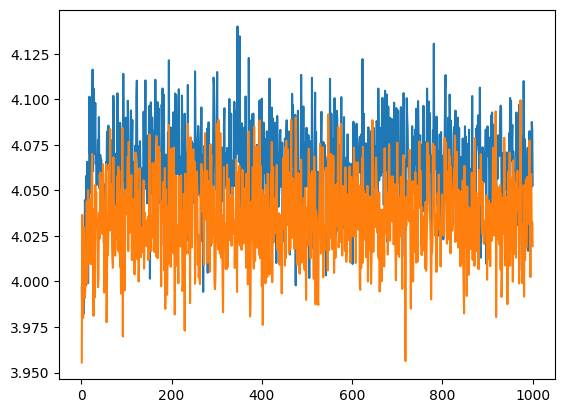

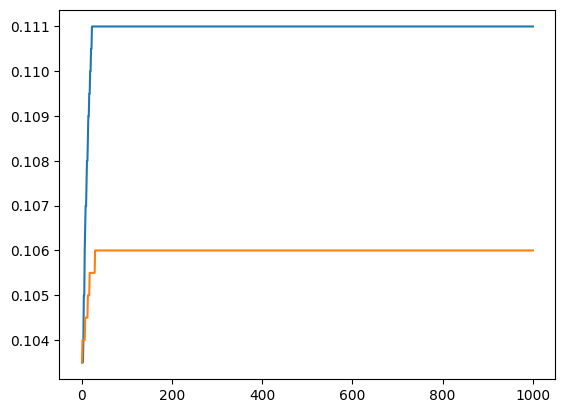

In [6]:
import matplotlib.pyplot as plt
import numpy as np

k = 10 # number of arms
bandits = 2000 # number of bandit problems
time_steps = 1000 # number of (time) steps
mu, sigma = 4, 1 # mean, standard deviation

# for plotting graphs
reward_graph = plt.figure(1).gca() # reward graph
action_graph = plt.figure(2).gca() # action graph
x_vals = range(1, time_steps+1) # values of x axis (time steps)

# true values
Q_star = np.random.normal(mu, sigma, (bandits, k))
# A_opt = np.argmax(Q_star, 1)

def softmax(H): # softmax distribution function
    exp = np.exp(H - np.max(H))
    prob = exp / np.sum(exp)
    max_ind = np.argmax(prob)
    return max_ind, prob

alpha = [0.1, 0.4] # for constant step-size approach

def gradient_bandit(k, steps, alpha, initial_Q, is_baseline=True):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    
    for i in range(bandits):
        Q = np.ones(k) * initial_Q # initial Q
        N = np.zeros(k) # initalize number of rewards given
        R = np.zeros(k)
        H = np.zeros(k) # initalize preferences
        pi = np.zeros(k)
        best_action = np.argmax(Q_star[i]) # best action of i'th problem
        
        for t in range(steps):
            a, pi = softmax(H)

            reward = np.random.normal(Q_star[i][a], sigma)

            N[a] += 1
            Q[a] = Q[a] + (reward - Q[a]) / N[a]
            
            for action_i in range(k):
                if action_i == a :
                    H[a] = H[a] + alpha * (reward - R[a]) * (1 - pi[a])
                else:
                    H[action_i] = H[action_i] - alpha * (reward - R[action_i]) * pi[action_i]

            if is_baseline == True:
                R[a] = Q[a]

            rewards[t] += reward
            if a == best_action:
                actions[t] += 1
    
    return np.divide(rewards,bandits), np.divide(actions,bandits)

y1, y2 = gradient_bandit(k, time_steps, alpha[0], 0, is_baseline=True)
y3, y4 = gradient_bandit(k, time_steps, alpha[1], 0, is_baseline=True)
reward_graph.plot(x_vals, y1)
reward_graph.plot(x_vals, y3)
action_graph.plot(x_vals, y2)
action_graph.plot(x_vals, y4)
plt.show()